In [3]:
!pip show pandas

Name: pandas
Version: 1.0.5
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: None
Author-email: None
License: BSD
Location: c:\anaconda333\lib\site-packages
Requires: pytz, numpy, python-dateutil
Required-by: statsmodels, seaborn


In [4]:
import pandas as pd
data = pd.read_csv('data/data_draw_korea.csv')
print(type(data))  # =><class 'pandas.core.frame.DataFrame'>
data.head(3)

<class 'pandas.core.frame.DataFrame'>


,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
0,0,202520,강릉,11,4,1040.07,강원도,강릉시
1,1,25589,고성(강원),9,0,664.19,강원도,고성군
2,2,86747,동해,11,5,180.01,강원도,동해시


#read_Csv()함수

*csv file 읽기
*head(), tali() 함수로 일부 데이터 가져오기
*columns, index, shape, info() 로 메타정보 확인
*describe(), max(), mean() 집계함수
*컬럼명 변경, 특정 컴럼을 인덱스로 변경하기

In [5]:
#column명
print(data.columns)#괄호 붙이지 않아 property

Index(['Unnamed: 0', '인구수', 'shortName', 'x', 'y', '면적', '광역시도', '행정구역'], dtype='object')


In [6]:
#인덱스 
print(data.index)

RangeIndex(start=0, stop=229, step=1)


In [7]:
#몇행 몇열
print(data.shape)

(229, 8)


In [8]:
#info() -dataframe의 meta정보
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  229 non-null    int64  
 1   인구수         229 non-null    int64  
 2   shortName   229 non-null    object 
 3   x           229 non-null    int64  
 4   y           229 non-null    int64  
 5   면적          229 non-null    float64
 6   광역시도        229 non-null    object 
 7   행정구역        229 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 14.4+ KB


In [9]:
#describe() -집계함수
data.describe()

,Unnamed: 0,인구수,x,y,면적
count,229.000000,2.290000e+02,229.000000,229.000000,229.000000
mean,114.000000,2.110898e+05,6.117904,11.262009,435.419795
std,66.250786,2.074378e+05,3.320469,6.040898,381.612549
min,0.000000,8.392000e+03,0.000000,0.000000,2.800000
25%,57.000000,4.955900e+04,3.000000,6.000000,54.000000
50%,114.000000,1.401590e+05,6.000000,11.000000,436.400000
75%,171.000000,3.216180e+05,9.000000,16.000000,692.800000
max,228.000000,1.125461e+06,13.000000,25.000000,1817.940000


In [10]:
#인구수 컬럼값의 최대 최소 평균
print(type(data['인구수'])) #Series
#컬럼 한개 선택
data['인구수'].head() #=> 인덱스랑 인구수만 나옴

<class 'pandas.core.series.Series'>


0    202520
1     25589
2     86747
3     63986
4     76733
Name: 인구수, dtype: int64

In [11]:
print('최소',data['인구수'].min())
print('최대',data['인구수'].max())
print('평균',data['인구수'].mean())
print('편차',data['인구수'].std())

최소 8392
최대 1125461
평균 211089.77729257641
편차 207437.8370475227


In [12]:
#컬럼명 변경
data = data.rename(columns={'Unnamed: 0':'seq'}) #딕형태로
data.head(2)

,seq,인구수,shortName,x,y,면적,광역시도,행정구역
0,0,202520,강릉,11,4,1040.07,강원도,강릉시
1,1,25589,고성(강원),9,0,664.19,강원도,고성군


In [13]:
#seq 컬럼을 index로 변경하기
data = data.set_index('seq')
data.head(2)

,인구수,shortName,x,y,면적,광역시도,행정구역
seq,,,,,,,
0,202520,강릉,11,4,1040.07,강원도,강릉시
1,25589,고성(강원),9,0,664.19,강원도,고성군


###특정행열 선택

In [14]:
#왼쪾 행 오른쪽 열
#인구수 , 행정구역 2개의 컬럼 선택
data.loc[:,['인구수', '행정구역','광역시도']].head(3)
# 한개면 시리즈, 여러개면 데이터프레임형태 -> 테이블로 표현됨

,인구수,행정구역,광역시도
seq,,,
0,202520,강릉시,강원도
1,25589,고성군,강원도
2,86747,동해시,강원도


In [15]:
#인구수 부터 면적까지 slicing
data.loc[:, '인구수':'면적'].head(5)

,인구수,shortName,x,y,면적
seq,,,,,
0,202520,강릉,11,4,1040.07
1,25589,고성(강원),9,0,664.19
2,86747,동해,11,5,180.01
3,63986,삼척,11,8,1185.80
4,76733,속초,9,1,105.25


In [16]:
#1개행만 선택
data.loc[0, :]

인구수           202520
shortName         강릉
x                 11
y                  4
면적           1040.07
광역시도             강원도
행정구역             강릉시
Name: 0, dtype: object

In [17]:
#여러개 특정행
data.loc[[0, 3, 4],:]

,인구수,shortName,x,y,면적,광역시도,행정구역
seq,,,,,,,
0,202520,강릉,11,4,1040.07,강원도,강릉시
3,63986,삼척,11,8,1185.80,강원도,삼척시
4,76733,속초,9,1,105.25,강원도,속초시


In [18]:
#여러개의 행(구간-slicing)
data.loc[0:3,:] # 생략 0:3:1

,인구수,shortName,x,y,면적,광역시도,행정구역
seq,,,,,,,
0,202520,강릉,11,4,1040.07,강원도,강릉시
1,25589,고성(강원),9,0,664.19,강원도,고성군
2,86747,동해,11,5,180.01,강원도,동해시
3,63986,삼척,11,8,1185.80,강원도,삼척시


In [19]:
#ilic사용
data.iloc[0:3, 0:3]


,인구수,shortName,x
seq,,,
0,202520,강릉,11
1,25589,고성(강원),9
2,86747,동해,11


In [20]:
data.iloc[0:20:2, 0:3]

,인구수,shortName,x
seq,,,
0,202520,강릉,11
2,86747,동해,11
4,76733,속초,9
6,24551,양양,10
8,313851,원주,10
10,34242,정선,11
12,264144,춘천,10
14,38439,평창,10
16,23612,화천,7


In [21]:
#중복 싫어
data['광역시도'].unique()

array(['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시',
       '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도', '제주특별자치도',
       '충청남도', '충청북도'], dtype=object)

In [22]:
#수세기
data['광역시도'].value_counts()

경기도        31
서울특별시      25
경상북도       23
전라남도       22
강원도        18
경상남도       18
부산광역시      16
충청남도       15
전라북도       14
충청북도       11
인천광역시      10
대구광역시       8
대전광역시       5
광주광역시       5
울산광역시       5
제주특별자치도     2
세종특별자치시     1
Name: 광역시도, dtype: int64

In [23]:
data.loc[data['광역시도']=='서울특별시', :]
data.loc[data['광역시도']=='서울특별시']

,인구수,shortName,x,y,면적,광역시도,행정구역
seq,,,,,,,
124,526157,서울강남,6,7,39.50,서울특별시,강남구
125,432028,서울강동,8,5,24.60,서울특별시,강동구
126,310292,서울강북,5,2,23.60,서울특별시,강북구
127,554709,서울강서,4,4,41.40,서울특별시,강서구
128,484478,서울관악,5,6,29.60,서울특별시,관악구
129,342909,서울광진,7,6,17.05,서울특별시,광진구
130,401233,서울구로,4,7,20.11,서울특별시,구로구
131,222566,서울금천,5,7,13.01,서울특별시,금천구
132,547202,서울노원,6,1,35.44,서울특별시,노원구


In [24]:
data.loc[data['광역시도']=='부산광역시', ['행정구역','인구수']]

,행정구역,인구수
seq,,
108,강서구,84722
109,금정구,235887
110,기장군,142223
111,남구,271753
112,동구,85952
113,동래구,256584
114,부산진구,365721
115,북구,292375
116,사상구,228824


In [25]:
mean_value = data['인구수'].mean()
mean_value

211089.77729257641

In [26]:
#인구수가 평균보다 낮은 지역 가져오기
data.loc[data['인구수']<mean_value]

,인구수,shortName,x,y,면적,광역시도,행정구역
seq,,,,,,,
0,202520,강릉,11,4,1040.07,강원도,강릉시
1,25589,고성(강원),9,0,664.19,강원도,고성군
2,86747,동해,11,5,180.01,강원도,동해시
3,63986,삼척,11,8,1185.80,강원도,삼척시
4,76733,속초,9,1,105.25,강원도,속초시
...,...,...,...,...,...,...,...
223,86441,음성,5,10,521.05,충청북도,음성군
224,127462,제천,8,10,882.47,충청북도,제천시
225,34480,증평,6,11,81.84,충청북도,증평군


In [27]:
#경기도에서 인구수 평균보다 높은 행정구역
# data.loc[()&(), ['','']]
data.loc[(data['광역시도']=='경기도')&(data['인구수']>mean_value)]

,인구수,shortName,x,y,면적,광역시도,행정구역
seq,,,,,,,
19,955384,고양,4,2,267.33,경기도,고양시
21,327111,광명,3,3,38.50,경기도,광명시
22,290210,광주,8,7,431.84,경기도,광주시
24,273302,군포,5,8,36.35,경기도,군포시
25,326523,김포,2,3,276.64,경기도,김포시
26,610300,남양주,8,3,458.44,경기도,남양주시
28,805473,부천,2,4,53.44,경기도,부천시
29,911628,성남,7,8,141.82,경기도,성남시
30,1125461,수원,6,9,121.09,경기도,수원시


In [28]:
#강원도에서 가장 높은 인구수
data.loc[(data['광역시도']=='강원도'), '인구수'].max()

313851

In [29]:
# 특정 광역시 행정구역에 대한 최대 인구수 함수 data.loc[data[]]...이런식
def max_s(sido):
    return data.loc[data['광역시도']==sido,'인구수'].max()


In [30]:
max_s('서울특별시')

615487

In [31]:
#max_s에 대한 모든 컬럼 데이터 싶어
data.loc[data['인구수']==max_s('서울특별시')]

,인구수,shortName,x,y,면적,광역시도,행정구역
seq,,,,,,,
141,615487,서울송파,8,6,33.9,서울특별시,송파구


In [32]:
# 특정 광역시로 인구 가장 많은 곳의 인구수를 알고 싶어
def get_pop_max_df(sido):
    #return data.loc[data['인구수']== max_s(sido)] #모든 컬럼 다나와
    
    #광역시도, 행정구역, 인구수 만 알고싶어
    return data.loc[data['인구수']==max_s(sido),\
                   ['광역시도', '행정구역', '인구수']]

In [33]:
get_pop_max_df('부산광역시')

,광역시도,행정구역,인구수
seq,,,
123,부산광역시,해운대구,397134


In [34]:
#광역시명 다 알아오기 중복 안되게
data['광역시도'].unique() #타입 : array

array(['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시',
       '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도', '제주특별자치도',
       '충청남도', '충청북도'], dtype=object)

In [35]:
for sido in data['광역시도'].unique():
    print(sido)
    print(get_pop_max_df(sido))

강원도
    광역시도 행정구역     인구수
seq                  
8    강원도  원주시  313851
경기도
    광역시도 행정구역      인구수
seq                   
30   경기도  수원시  1125461
경상남도
     광역시도 행정구역      인구수
seq                    
61   경상남도  창원시  1010040
경상북도
     광역시도 행정구역     인구수
seq                   
89   경상북도  포항시  488395
광주광역시
      광역시도 행정구역     인구수
seq                    
93   광주광역시   북구  439683
대구광역시
      광역시도 행정구역     인구수
seq                    
96   대구광역시  달서구  584517
대전광역시
      광역시도 행정구역     인구수
seq                    
105  대전광역시   서구  475094
부산광역시
      광역시도  행정구역     인구수
seq                     
123  부산광역시  해운대구  397134
서울특별시
      광역시도 행정구역     인구수
seq                    
141  서울특별시  송파구  615487
세종특별자치시
        광역시도 행정구역     인구수
seq                      
149  세종특별자치시  세종시  191233
울산광역시
      광역시도 행정구역     인구수
seq                    
150  울산광역시   남구  327270
인천광역시
      광역시도 행정구역     인구수
seq                    
160  인천광역시  부평구  527153
전라남도
     광역시도 행정구역     인구수
seq                   
177  전라남도  여수시  2631

In [36]:
# 새로운 dataframe 생성하기
max_pop_df = pd.DataFrame(columns = ['광역시도', '행정구역','인구수'])
#max_pop_df = pd.DataFrame() => 컬럼을 만들어 줘야 함, 아무것도 출력 안됨 
max_pop_df

,광역시도,행정구역,인구수


In [37]:
#각 광역시도에서 인구수가 가장 많은 행정구역 출력
for sido in data['광역시도'].unique(): # 중복되지 않게
    max_pop_df = max_pop_df.append(get_pop_max_df(sido))
max_pop_df    

,광역시도,행정구역,인구수
8,강원도,원주시,313851
30,경기도,수원시,1125461
61,경상남도,창원시,1010040
89,경상북도,포항시,488395
93,광주광역시,북구,439683
96,대구광역시,달서구,584517
105,대전광역시,서구,475094
123,부산광역시,해운대구,397134
141,서울특별시,송파구,615487
149,세종특별자치시,세종시,191233


In [38]:
#reset_index(drop=True) -인덱스 조정
#인덱스 값을 변경하면서 기존 인덱스 값을 컬럼을 변경
#drop=True가 되면 기존 인덱스 값이 포함된 인덱스 칼럼 삭제
max_pop_df = max_pop_df.reset_index(drop=True)
max_pop_df

,광역시도,행정구역,인구수
0,강원도,원주시,313851
1,경기도,수원시,1125461
2,경상남도,창원시,1010040
3,경상북도,포항시,488395
4,광주광역시,북구,439683
5,대구광역시,달서구,584517
6,대전광역시,서구,475094
7,부산광역시,해운대구,397134
8,서울특별시,송파구,615487
9,세종특별자치시,세종시,191233


In [39]:
max_pop_df.index

RangeIndex(start=0, stop=17, step=1)

In [41]:
### 여기부터 다시하기
#인덱스를 1부터 시작하는 방법
#arange(3) : array의[0,1,2 ]반환
import numpy as np
#인덱스 변경
max_pop_df.index = np.arange(1, len(max_pop_df)+1) #arange()

print(max_pop_df.index)
max_pop_df

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17], dtype='int64')


,광역시도,행정구역,인구수
1,강원도,원주시,313851
2,경기도,수원시,1125461
3,경상남도,창원시,1010040
4,경상북도,포항시,488395
5,광주광역시,북구,439683
6,대구광역시,달서구,584517
7,대전광역시,서구,475094
8,부산광역시,해운대구,397134
9,서울특별시,송파구,615487
10,세종특별자치시,세종시,191233


In [45]:
#값을 원하는 조건으로 정렬
# shift+ tab : tab의 반대  역할
max_pop_df.sort_values(by='인구수', ascending=False)
max_pop_df.sort_values(by='인구수', ascending=False).reset_index(drop=True)
# 인덱스 뒤죽박죽 -> 기존 인덱스 초기화 위함,drop=false 는 기존의 인덱스 하나의
#컬럼으로 남음, True로 설정하면 기존의 인덱스 버리고 새로 만들어줌
#set_index : 기존의 행 인덱스 제거, 데잍 열중 하나 인덱스로 설정
# reset_index : 기존의 행 인덱스 제거, 인덱스를 데이터 열로 추가

,광역시도,행정구역,인구수
0,경기도,수원시,1125461
1,경상남도,창원시,1010040
2,충청북도,청주시,790216
3,전라북도,전주시,630708
4,서울특별시,송파구,615487
5,충청남도,천안시,584912
6,대구광역시,달서구,584517
7,인천광역시,부평구,527153
8,경상북도,포항시,488395
9,대전광역시,서구,475094


## 상관계수
* 상관계수는 -1~1 사이의 값
* 1에 가까울수록 서로 관련성 있음
* corr() 함수 사용

In [47]:
# 전체의 면적과 인구수의 상관관계
data['면적'].corr(data['인구수'])

-0.3460351605045768

In [49]:
#서울 특별시의 면적과 인구수의 상관관계
# 먼저 서울 특별시 변수
seoul_df = data.loc[data['광역시도']=='서울특별시']
# 서울 면적과 인구수의 상관계수
seoul_df['면적'].corr(seoul_df['인구수'])

0.6644268188909778

### groupby 기능 사용하기
* series 객체의 groupby() : 컬럼1
* dataframe 객체의 groupby() : 컬럼 여럿

In [50]:
data['광역시도'].value_counts()

경기도        31
서울특별시      25
경상북도       23
전라남도       22
강원도        18
경상남도       18
부산광역시      16
충청남도       15
전라북도       14
충청북도       11
인천광역시      10
대구광역시       8
대전광역시       5
광주광역시       5
울산광역시       5
제주특별자치도     2
세종특별자치시     1
Name: 광역시도, dtype: int64

In [51]:
#광역시도별 인구수의 합계
# ~별에 해당하는 컬럼은 groupby()함수의 파라미터로 전달
data['인구수'].groupby(data['광역시도']).sum()

광역시도
강원도         1429438
경기도        11744210
경상남도        3144487
경상북도        2508964
광주광역시       1438209
대구광역시       2378450
대전광역시       1467677
부산광역시       3323591
서울특별시       9394807
세종특별자치시      191233
울산광역시       1105585
인천광역시       2766575
전라남도        1700563
전라북도        1739048
제주특별자치도      575873
충청남도        1946129
충청북도        1484720
Name: 인구수, dtype: int64

In [52]:
data.groupby('광역시도').sum()

,인구수,x,y,면적
광역시도,,,,
강원도,1429438,173,68,16874.810
경기도,11744210,182,162,10179.743
경상남도,3144487,123,313,10437.460
경상북도,2508964,229,240,19021.850
광주광역시,1438209,12,99,501.280
대구광역시,2378450,74,111,885.690
대전광역시,1467677,23,66,539.640
부산광역시,3323591,162,276,763.240
서울특별시,9394807,142,111,605.390


In [53]:
#data['인구수'].groupby(data['광역시도']).sum()
data.groupby('광역시도')['인구수'].sum()

광역시도
강원도         1429438
경기도        11744210
경상남도        3144487
경상북도        2508964
광주광역시       1438209
대구광역시       2378450
대전광역시       1467677
부산광역시       3323591
서울특별시       9394807
세종특별자치시      191233
울산광역시       1105585
인천광역시       2766575
전라남도        1700563
전라북도        1739048
제주특별자치도      575873
충청남도        1946129
충청북도        1484720
Name: 인구수, dtype: int64

In [54]:
# 광역시도별, 행정구역별 인구수
data.groupby(['광역시도','행정구역'])['인구수'].sum()

광역시도  행정구역
강원도   강릉시     202520
      고성군      25589
      동해시      86747
      삼척시      63986
      속초시      76733
               ...  
충청북도  제천시     127462
      증평군      34480
      진천군      62809
      청주시     790216
      충주시     198077
Name: 인구수, Length: 229, dtype: int64

In [57]:
grouping_data = data.groupby(['광역시도', '행정구역'])['인구수'].sum()
type(grouping_data)

pandas.core.series.Series

In [58]:
#주피터 노트북에 플롯이 그려지게 하기 위한 설정
# 이 설정을 하면 nobtebook 에서 show() 호출하지 않아도 플롯 출력
# matplotlib nbagg 설정은 생성되는 플롯을 인터랙티브하게 조작 가능
# matplotlib inline 설정은 플롯 일단 생성하면 조작 불가
%matplotlib inline

In [59]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

In [60]:
#matplotlib에 맑은 고딕 한글 폰트 - 한글쓸거라
font_path = 'C:/Windows/Fonts/malgun.ttf'
#font_path
#font_property 가져오기
font_prop = fm.FontProperties(fname = font_path).get_name()
#matplot의 rc명령을 사용해서 한글폰트 설정
matplotlib.rc('font', family = font_prop)

Figure(1296x864)
AxesSubplot(0.125,0.536818;0.775x0.343182) AxesSubplot(0.125,0.125;0.775x0.343182)


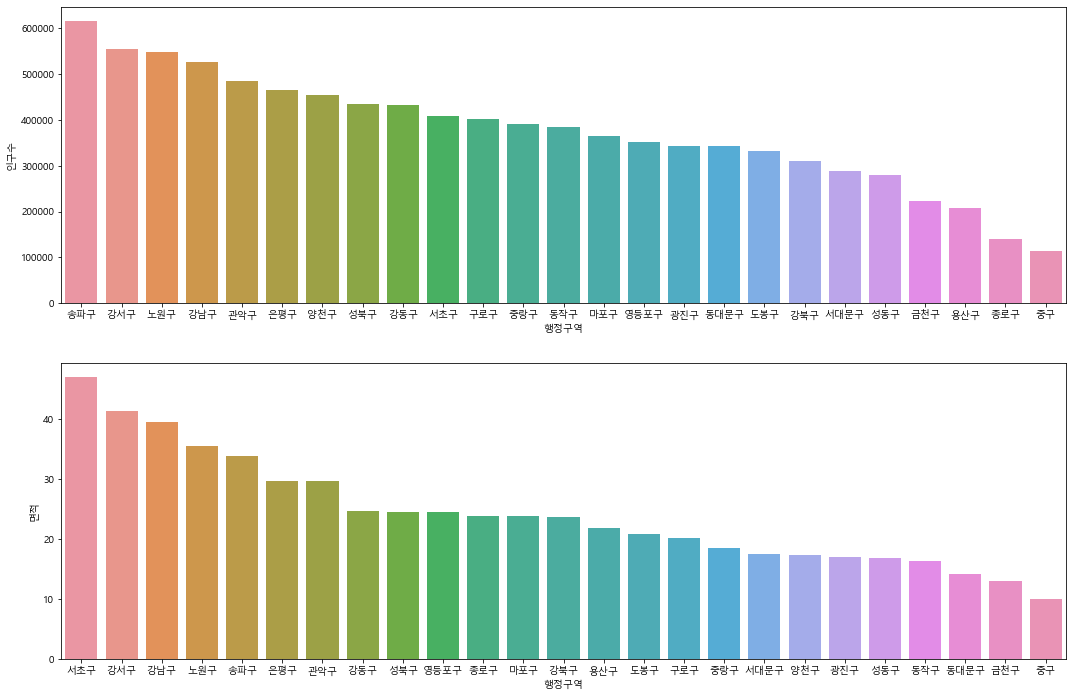

In [65]:
#figure와 plt을 생성, 이 함수는 두개 이상 리턴 가능, 두개 이상 변수에 넣기 가능
figure,(axes1, axes2) = plt.subplots(nrows=2, ncols =1) 
#figure size 조정
figure.set_size_inches(18, 12)
print(figure)
print(axes1, axes2)
sns.barplot(data=seoul_df.sort_values(by='인구수', ascending=False), x='행정구역'\
           , y='인구수', ax= axes1)
sns.barplot(data=seoul_df.sort_values(by='면적', ascending=False), x='행정구역'\
            , y='면적',  ax=axes2)

Figure(1296x864)
AxesSubplot(0.125,0.536818;0.775x0.343182) AxesSubplot(0.125,0.125;0.775x0.343182)


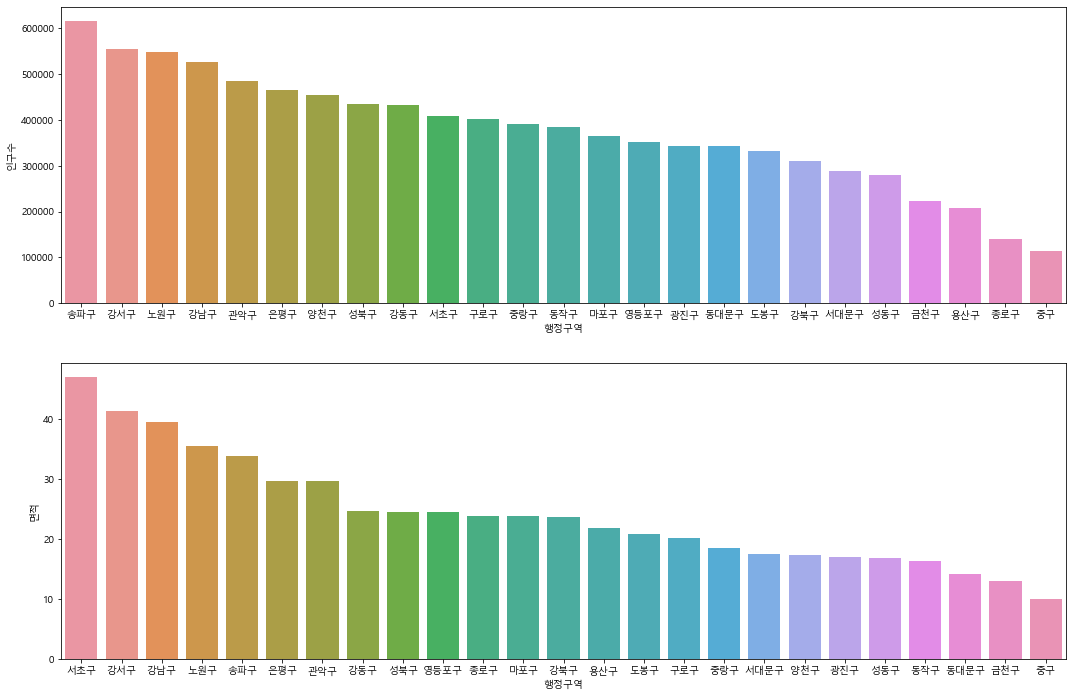

In [67]:
##광역시 던지면 면적과 인구수 보여주는 함수 만들기
def show_barplot(sido):
    data_df = data.loc[data['광역시도']==sido]
    #figure와 plt을 생성, 이 함수는 두개 이상 리턴 가능, 두개 이상 변수에 넣기 가능
    figure,(axes1, axes2) = plt.subplots(nrows=2, ncols =1) 
    #figure size 조정
    figure.set_size_inches(18, 12)
    print(figure)
    print(axes1, axes2)
    sns.barplot(data=seoul_df.sort_values(by='인구수', ascending=False), x='행정구역'\
               , y='인구수', ax= axes1)
    sns.barplot(data=seoul_df.sort_values(by='면적', ascending=False), x='행정구역'\
                , y='면적',  ax=axes2)

show_barplot('서울특별시')